# Import Modules

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime as dt 
import matplotlib.pyplot as plt


# Data Preprocessing

In [2]:
# Import data from files
os.chdir('/Users/talhajamal/Desktop/Code/BigData1Project')
data = pd.read_csv("data/Returns_Data.csv")
data['date'] = pd.to_datetime(data['date'], dayfirst=False)
characteristics = pd.read_csv("data/Stock_Characteristics_Data.csv")
dictionary = pd.read_excel("data/StockDataDictionary.xlsx")

# Create new dataframes
prices = data.pivot(index='date', columns='ticker', values='PRC')
volume = data.pivot(index='date', columns='ticker', values='VOL')
returns = data.pivot(index='date', columns='ticker', values='RET')
#returns = returns * 100 # Scale returns to percentage
# Summary of Returns
returns_summary = returns.describe()
shares_outstanding = data.pivot(index='date', columns='ticker', values='SHROUT')
value_weighted_returns = data.pivot(index='date', columns='ticker', values='vwretd')
equal_weighted_returns = data.pivot(index='date', columns='ticker', values='ewretd')
tickers = prices.columns # List of Tickers

# Spit Test and Train data
slice_date = dt(year=2018, month=1, day=1)
y_train = returns.loc[:slice_date]
y_test = returns.loc[slice_date:]

# Feature Generation

## Feature 1: On Balance Volume

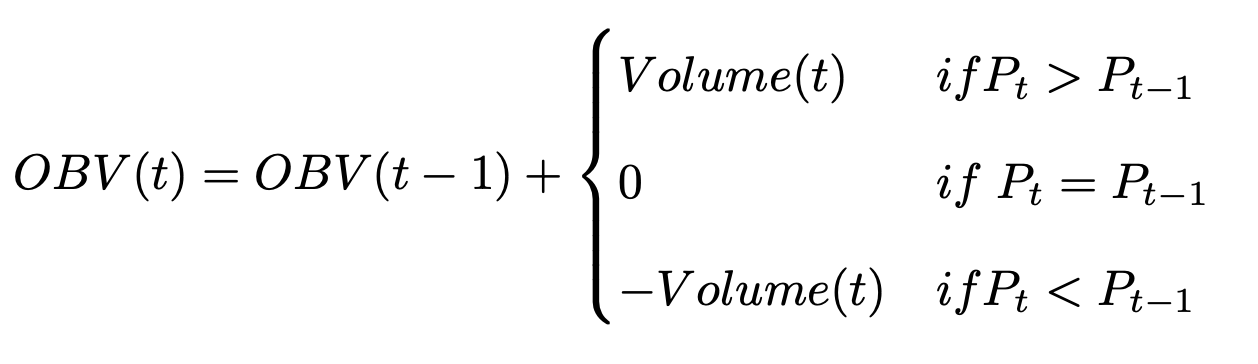

In [17]:
# Feature 1: On Balance Volume
def calculate_obv(stock_returns, stock_volumes):
    """ Function to calculate On Balance Volume"""
    sign = stock_returns.apply(np.sign) # Sign Series: 1 if the return is positive, -1 if negative, 0 if unchanged
    daily_obv_changes = sign * stock_volumes # Daily OBV changes
    obv = daily_obv_changes.cumsum() # Cumulative sum of daily changes
    return obv

# Apply the function to each stock (column)
OBV = returns.apply(lambda col: calculate_obv(col, volume[col.name]), axis=0)

In [ ]:
plt.plot()

In [19]:
OBV['MSFT']

date
2010-01-04    3.856467e+07
2010-01-05    8.846518e+07
2010-01-06    3.012618e+07
2010-01-07   -2.058637e+07
2010-01-08    3.077196e+07
                  ...     
2020-12-24    9.976457e+08
2020-12-28    1.015543e+09
2020-12-29    9.981632e+08
2020-12-30    9.779274e+08
2020-12-31    9.988440e+08
Name: MSFT, Length: 2769, dtype: float64

## Feature 2: 